In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision.transforms as T
from PIL import Image

# Visualize Image Transformations
- 2 input params (original image & torchvision object)
- Additional 2 predefined params for figsize and plot title

In [6]:
def visualize_transform(image, transform, figsize=(12, 6), title=None):
    # Convert input to PIL Image
    if isinstance(image, np.ndarray):
        image = Image.fromarray(np.uint8(image))
    elif isinstance(image, torch.Tensor):
        if image.dim() == 4:  # batch of images
            image = image[0]  # take first image from batch
        if image.shape[0] in [1, 3]:  # if channel-first format (C,H,W)
            image = image.permute(1, 2, 0)  # change to (H,W,C)
        image = Image.fromarray(np.uint8(image.numpy() * 255))

    # Apply transformation
    try:
        transformed_image = transform(image)
    except Exception as e:
        print(f"Error applying transformation: {e}")
        return None

    # Convert transformed image to numpy array if it's a tensor
    if isinstance(transformed_image, torch.Tensor):
        if transformed_image.dim() == 4:  # batch of images
            transformed_image = transformed_image[0]  # take first image from batch
        if transformed_image.shape[0] in [1, 3]:  # if channel-first format (C,H,W)
            transformed_image = transformed_image.permute(1, 2, 0)  # change to (H,W,C)
        transformed_image = transformed_image.numpy()

        # If image has values in [0,1], scale to [0,255]
        if transformed_image.max() <= 1.0:
            transformed_image = transformed_image * 255

        transformed_image = np.uint8(transformed_image)
        transformed_image = Image.fromarray(transformed_image)

    # Create the figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # Set the main title if provided
    if title:
        fig.suptitle(title, fontsize=16)

    # Plot original image
    axes[0].imshow(np.array(image))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Plot transformed image
    axes[1].imshow(np.array(transformed_image))
    axes[1].set_title(f'Transformed Image\n{transform.__class__.__name__}')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

    return fig

# Function Test
- Load image
- Define transform
- visualize_transform() - set graph as variable because already got plt.show() in function

In [9]:
img = Image.open('C:\\Users\\jrom\\DataspellProjects\\Drowning-Detection\\data\\images\\train\\000003.jpg')

### 1. Random Flip

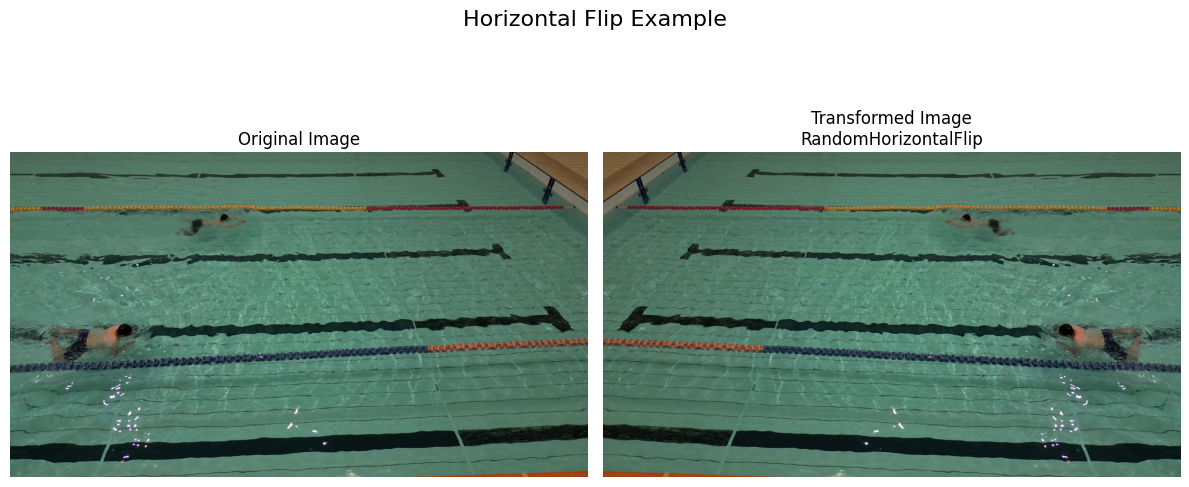

In [10]:
transform = T.transforms.RandomHorizontalFlip(p=1.0)  # always flip
graph = visualize_transform(img, transform, title="Horizontal Flip Example")

### 2. Random Rotation

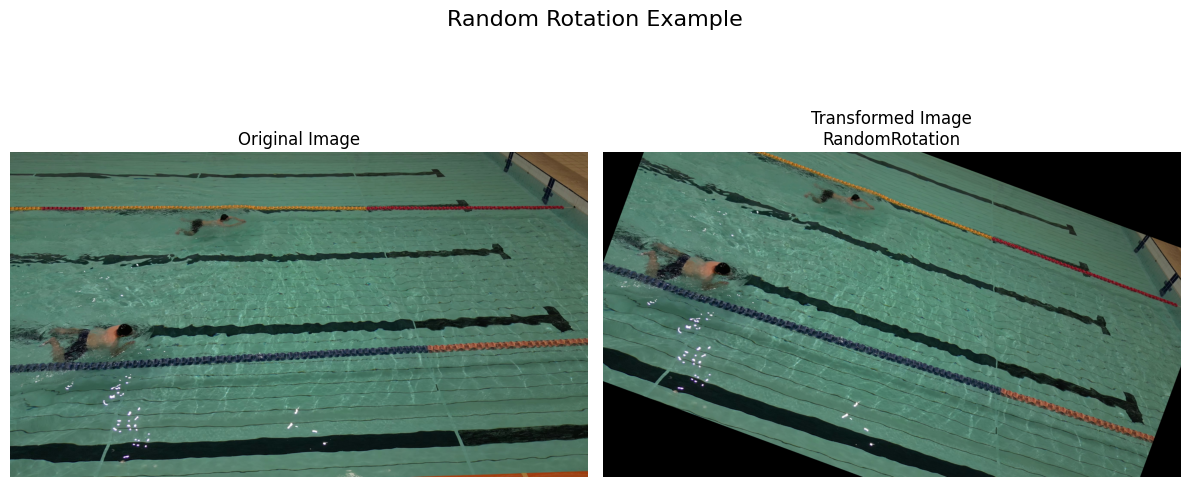

In [11]:
transform = T.RandomRotation(degrees=45)
graph = visualize_transform(img, transform, title="Random Rotation Example")